---

# Artificial Intelligence - COMPSCI4004 2018-2019

## Lab 3: Search <small><small><small>v2019a</small></small></small>

----

 ### Introduction

We will examine how a particular class of AI-problems can be solved using classical search techniques such as A-star. We will formulate a Maze-navigation problem as a graph-search problem in Python and use the `AIMA Toolbox` (https://github.com/aimacode/aima-python) to suggest a solution (i.e., a set of actions) which hopefully leads the agent from the initial state to the goal state. We will furthermore explore the limitations of A-star for general Maze-navigation problems. 

Thus, the object of the lab exerise is to:

* Formulate the agent function as an graph-search problem based on the PEAS analysis/characterization
* Get hands-on experience with A* and heuristic functions
* Appreciate the limitations of A-star for general navigation problems

<font color=red>Note: The questions are intentioannly open-ended and we highly recommend that you discuss the question and your answers with the tutors. A basic model solution will be provided on Moodle a week after the lab.</font>

---
### Q3.0 Prerequisites / housekeeping

The notebook relies on the following software:
- A Python 3.5+ environment and additional pacakges (see the imports for specific requirements)
- AIMA Toolbox: https://github.com/aimacode/aima-python which comes with the book (free) and contains off-the-shelf implementations of various search algorithms and many other relevant methods.

#### Q3.0.1 Import the basics

- Run the follwing cell which loads the very basic Python modules and checks the environmental variables

In [132]:
# Check the very basics
import os, sys
print("Working dir:"+os.getcwd())
print("Python version:"+sys.version)

Working dir:C:\Users\Bjorn\Dropbox\ug\ai20182019\week03_search\lab_3_search
Python version:3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]


#### Q3.0.2 Import Python core modules

- Run the following code to import core Python models

In [133]:
from copy import deepcopy 
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import lines

#### Q3.0.2 Import Python Network/Graph modules

- Run the cell to import the graph module allowing you to work with graphs in Python:

In [135]:
import networkx as nx
print("networkx version:"+nx.__version__)

networkx version:2.1


#### Q3.0.2 Import Python visualization modules

- Import modules which allows you to visualise the graphs and solutions. Note: You can skip this step if you fail installing the the `ipywidgets` Python package however you will not be able to interactively visualize the graphs and solutions. `ipywidgets`  is easy to install ia the Anaconda packagae but can be tricky to run on custom Python setups in which case we recommend skipping the step.

In [139]:
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display
print("ipywidgets version:" + widgets.__version__)

ipywidgets version:7.2.1


#### Q3.0.2 Import the AIMA Toolbox

- Download/pull the AIMA toolbox from https://github.com/aimacode/aima-python
- Import the AIMA toolbox into the search path. Remember to change the `AIMA_TOOLBOX_ROOT` variable to match the relevant folder on your system

In [140]:
# Add path the to the AIMA Python Toolbox folder on your system
# WARNING: It is important that you use forward slash, even on Windows machines !

AIMA_TOOLBOX_ROOT="C:/Users/Bjorn/Dropbox/ug/ai20182019/tools/aima-python"
sys.path.append(AIMA_TOOLBOX_ROOT)

- Run the follwing code to import the search packe in the AIMA toolbox

In [141]:
from search import *

... you should now be ready to solve a AI problem.

----

### Q3.1 The Maze

Figure 1 shows a Maze. You are now given the task to design an intelligent agent that plan a route from S (with coordinates (0,0)) to G (with coordinates (1,9) ).

<img src="resources/maze.png" width=40%>
<center>Figure 1: A Maze</center>

In the follwing, we will explore how to approach this problem and implement a reasonable solution in Pyhton.

---

#### Q3.1.1 Analysis

- As always, analyse the problem and task environment using the PEAS framework. Note: you will need to make assumptions; make sure to state them:

    - Performance measure
        - As the designer of the Maze-solving agent, define a suitable performance measure?
    - Environment
        - Characterise the task environment along the dimensions outlined in AIMA Chapter 2?
    - Actuators        
        - Provide a list of actuators and possible actions ?
    - Sensors
        - Determine the percept available to the Maze-solving agent ?

----

#### Q3.1.2 Problem representation via graphs

In this part we will build a graph representation of the state-space including the actions (similar to the Romania graph in lecture 3) __assuming__ it is discrete, fully observable, static, deterministic and known.

##### Q3.1.2 (a) Define states and actions in a table

- Run the cells to defines your state-space as a table Hint: the S state is (0,0) and the G state is (1.9) !)

In [149]:
maze_map = UndirectedGraph(dict(
    S_00_00=dict(S_01_00=1),
    S_01_00=dict(S_01_01=1),
    S_03_00=dict(S_04_00=1,S_03_01=1),
    S_04_00=dict(S_03_00=1),
    S_07_00=dict(S_08_00=1),
    S_08_00=dict(S_09_00=1,S_07_00=1),
    S_09_00=dict(S_08_00=1,S_09_01=1),
    S_01_01=dict(S_01_00=1,S_02_01=1),
    S_02_01=dict(S_01_01=1,S_03_01=1),
    S_03_01=dict(S_03_00=1,S_03_02=1),
    S_09_01=dict(S_09_00=1),
    S_03_02=dict(S_03_01=1,S_04_02=1),
    S_04_02=dict(S_03_02=1,S_05_02=1,S_04_03=1),
    S_05_02=dict(S_04_02=1,S_05_03=1),
    S_01_03=dict(S_01_04=1,S_02_03=1),
    S_02_03=dict(S_01_03=1,S_02_04=1),
    S_04_03=dict(S_04_02=1,S_05_03=1,S_04_04=1),
    S_05_03=dict(S_05_02=1,S_06_03=1,S_04_03=1,S_05_04=1),
    S_06_03=dict(S_05_03=1,S_06_04=1),
    S_08_03=dict(S_08_04=1),
    S_01_04=dict(S_01_03=1,S_02_04=1),
    S_02_04=dict(S_01_04=1,S_02_05=1,S_02_03=1,S_03_04=1),
    S_03_04=dict(S_03_05=1,S_02_04=1,S_04_04=1),
    S_04_04=dict(S_04_03=1,S_03_04=1,S_05_04=1),
    S_05_04=dict(S_04_04=1,S_05_05=1,S_06_04=1,S_05_03=1),
    S_06_04=dict(S_06_03=1,S_07_04=1,S_05_04=1),
    S_07_04=dict(S_06_04=1,S_07_05=1,S_08_04=1),
    S_08_04=dict(S_07_04=1,S_08_03=1,S_08_05=1),
    S_00_05=dict(S_00_06=1),
    S_02_05=dict(S_02_06=1,S_02_04=1,S_03_05=1),
    S_03_05=dict(S_02_05=1,S_03_04=1),
    S_05_05=dict(S_05_04=1,S_05_06=1),
    S_07_05=dict(S_08_05=1,S_07_04=1,S_07_06=1),
    S_08_05=dict(S_09_05=1,S_07_05=1,S_08_04=1),
    S_09_05=dict(S_09_06=1,S_08_05=1),
    S_00_06=dict(S_00_07=1,S_00_05=1,S_01_06=1),
    S_01_06=dict(S_00_06=1,S_01_07=1,S_02_06=1),
    S_02_06=dict(S_02_07=1,S_02_05=1,S_01_06=1),
    S_04_06=dict(S_05_06=1,S_04_07=1),
    S_05_06=dict(S_04_06=1,S_06_06=1,S_05_05=1,S_05_07=1),
    S_06_06=dict(S_07_06=1,S_06_07=1,S_05_06=1),
    S_07_06=dict(S_06_06=1,S_07_05=1),
    S_09_06=dict(S_09_05=1,S_09_07=1),
    S_00_07=dict(S_00_08=1,S_01_07=1,S_00_06=1),
    S_01_07=dict(S_00_07=1,S_02_07=1,S_01_08=1,S_01_06=1),
    S_02_07=dict(S_01_07=1,S_03_07=1,S_02_06=1,S_02_08=1),
    S_03_07=dict(S_04_07=1,S_02_07=1),
    S_04_07=dict(S_03_07=1,S_05_07=1,S_04_08=1,S_04_06=1),
    S_05_07=dict(S_04_07=1,S_06_07=1,S_05_08=1,S_05_06=1),
    S_06_07=dict(S_06_06=1,S_06_08=1,S_05_07=1),
    S_08_07=dict(S_09_07=1),
    S_09_07=dict(S_08_07=1,S_09_06=1),
    S_00_08=dict(S_00_09=1,S_01_08=1,S_00_07=1),
    S_01_08=dict(S_00_08=1,S_02_08=1,S_01_09=1,S_01_07=1),
    S_02_08=dict(S_02_09=1,S_02_07=1,S_01_08=1),
    S_04_08=dict(S_04_09=1,S_05_08=1,S_04_07=1),
    S_05_08=dict(S_04_08=1,S_06_08=1,S_05_09=1,S_05_07=1),
    S_06_08=dict(S_07_08=1,S_06_07=1,S_05_08=1),
    S_07_08=dict(S_07_09=1,S_06_08=1),
    S_01_09=dict(S_01_08=1),
    S_00_09=dict(S_01_09=1,S_00_08=1),
    S_02_09=dict(S_01_09=1,S_02_08=1),
    S_04_09=dict(S_04_08=1,S_05_09=1),
    S_05_09=dict(S_05_08=1,S_04_09=1),
    S_07_09=dict(S_07_08=1)))

maze_map.locations = dict(
    S_00_00=(0,0),
    S_01_00=(1,0),
    S_03_00=(3,0),
    S_04_00=(4,0),
    S_07_00=(7,0),
    S_08_00=(8,0),
    S_09_00=(9,0),
    S_01_01=(1,1),
    S_02_01=(2,1),
    S_03_01=(3,1),
    S_09_01=(9,1),
    S_03_02=(3,2),
    S_04_02=(4,2),
    S_05_02=(5,2),
    S_01_03=(1,3),
    S_02_03=(2,3),
    S_04_03=(4,3),
    S_05_03=(5,3),
    S_06_03=(6,3),
    S_08_03=(8,3),
    S_01_04=(1,4),
    S_02_04=(2,4),
    S_03_04=(3,4),
    S_04_04=(4,4),
    S_05_04=(5,4),
    S_06_04=(6,4),
    S_07_04=(7,4),
    S_08_04=(8,4),
    S_00_05=(0,5),
    S_02_05=(2,5),
    S_03_05=(3,5),
    S_05_05=(5,5),
    S_07_05=(7,5),
    S_08_05=(8,5),
    S_09_05=(9,5),
    S_00_06=(0,6),
    S_01_06=(1,6),
    S_02_06=(2,6),
    S_04_06=(4,6),
    S_05_06=(5,6),
    S_06_06=(6,6),
    S_07_06=(7,6),
    S_09_06=(9,6),
    S_00_07=(0,7),
    S_01_07=(1,7),
    S_02_07=(2,7),
    S_03_07=(3,7),
    S_04_07=(4,7),
    S_05_07=(5,7),
    S_06_07=(6,7),
    S_08_07=(8,7),
    S_09_07=(9,7),
    S_00_08=(0,8),
    S_01_08=(1,8),
    S_02_08=(2,8),
    S_04_08=(4,8),
    S_05_08=(5,8),
    S_06_08=(6,8),
    S_07_08=(7,8),
    S_00_09=(0,9),
    S_01_09=(1,9),
    S_02_09=(2,9),
    S_04_09=(4,9),
    S_05_09=(5,9),
    S_07_09=(7,9))

maze_map_locations = maze_map.locations

print("----------------------------") 
print("Unique states (i.e.locations) and possible actions in those states:\n") 
print(maze_map.locations) 

----------------------------
Unique states (i.e.locations) and possible actions in those states:

{'S_00_00': (0, 0), 'S_01_00': (1, 0), 'S_03_00': (3, 0), 'S_04_00': (4, 0), 'S_07_00': (7, 0), 'S_08_00': (8, 0), 'S_09_00': (9, 0), 'S_01_01': (1, 1), 'S_02_01': (2, 1), 'S_03_01': (3, 1), 'S_09_01': (9, 1), 'S_03_02': (3, 2), 'S_04_02': (4, 2), 'S_05_02': (5, 2), 'S_01_03': (1, 3), 'S_02_03': (2, 3), 'S_04_03': (4, 3), 'S_05_03': (5, 3), 'S_06_03': (6, 3), 'S_08_03': (8, 3), 'S_01_04': (1, 4), 'S_02_04': (2, 4), 'S_03_04': (3, 4), 'S_04_04': (4, 4), 'S_05_04': (5, 4), 'S_06_04': (6, 4), 'S_07_04': (7, 4), 'S_08_04': (8, 4), 'S_00_05': (0, 5), 'S_02_05': (2, 5), 'S_03_05': (3, 5), 'S_05_05': (5, 5), 'S_07_05': (7, 5), 'S_08_05': (8, 5), 'S_09_05': (9, 5), 'S_00_06': (0, 6), 'S_01_06': (1, 6), 'S_02_06': (2, 6), 'S_04_06': (4, 6), 'S_05_06': (5, 6), 'S_06_06': (6, 6), 'S_07_06': (7, 6), 'S_09_06': (9, 6), 'S_00_07': (0, 7), 'S_01_07': (1, 7), 'S_02_07': (2, 7), 'S_03_07': (3, 7), 'S_04_07

----

##### Q3.1.2 (b) Create the graph object

- Execute the following cell to define a graph object based on the map and transition models defined in the previous question.

In [148]:
# initialise a graph
G = nx.Graph()

# use this while labeling nodes in the map
node_labels = dict()
node_colors = dict()
for n, p in maze_map_locations.items():
    G.add_node(n)            # add nodes from locations
    node_labels[n] = n       # add nodes to node_labels
    node_colors[n] = "white" # node_colors to color nodes while exploring the map

# we'll save the initial node colors to a dict for later use
initial_node_colors = dict(node_colors)
    
# positions for node labels
node_label_pos = {k:[v[0],v[1]-0.25] for k,v in maze_map_locations.items()} # spec the position of the labels relative to the nodes

# use this while labeling edges
edge_labels = dict()

# add edges between nodes in the map - UndirectedGraph defined in search.py
for node in maze_map.nodes():
    connections = maze_map.get(node)
    for connection in connections.keys():
        distance = connections[connection]        
        G.add_edge(node, connection) # add edges to the graph        
        edge_labels[(node, connection)] = distance # add distances to edge_labels
        
print("Done creating the graph object")

Done creating the graph object


----

##### Q3.1.2 (c) Visualise the graph

- Execute the cells to visualize the graph and check that everything looks as expected:

In [125]:
def show_map(node_colors):
    # set the size of the plot
    plt.figure(figsize=(16,13))
    # draw the graph (both nodes and edges) with locations
    nx.draw(G, pos = maze_map_locations, node_color = [node_colors[node] for node in G.nodes()])

    # draw labels for nodes
    node_label_handles = nx.draw_networkx_labels(G, pos = node_label_pos, labels = node_labels, font_size = 9)
    # add a white bounding box behind the node labels
    [label.set_bbox(dict(facecolor='white', edgecolor='none')) for label in node_label_handles.values()]

    # add edge lables to the graph
    nx.draw_networkx_edge_labels(G, pos = maze_map_locations, edge_labels=edge_labels, font_size = 8)
    
    # add a legend
    white_circle = lines.Line2D([], [], color="white", marker='o', markersize=15, markerfacecolor="white")
    orange_circle = lines.Line2D([], [], color="white", marker='o', markersize=15, markerfacecolor="orange")
    red_circle = lines.Line2D([], [], color="white", marker='o', markersize=15, markerfacecolor="red")
    gray_circle = lines.Line2D([], [], color="white", marker='o', markersize=15, markerfacecolor="gray")
    green_circle = lines.Line2D([], [], color="white", marker='o', markersize=15, markerfacecolor="green")
    plt.legend((white_circle, orange_circle, red_circle, gray_circle,green_circle),
               ('Un-explored', 'Frontier', 'Currently exploring', 'Explored', 'Solution path'),
               numpoints=1,prop={'size':16}, loc=(.8,1.0))
    

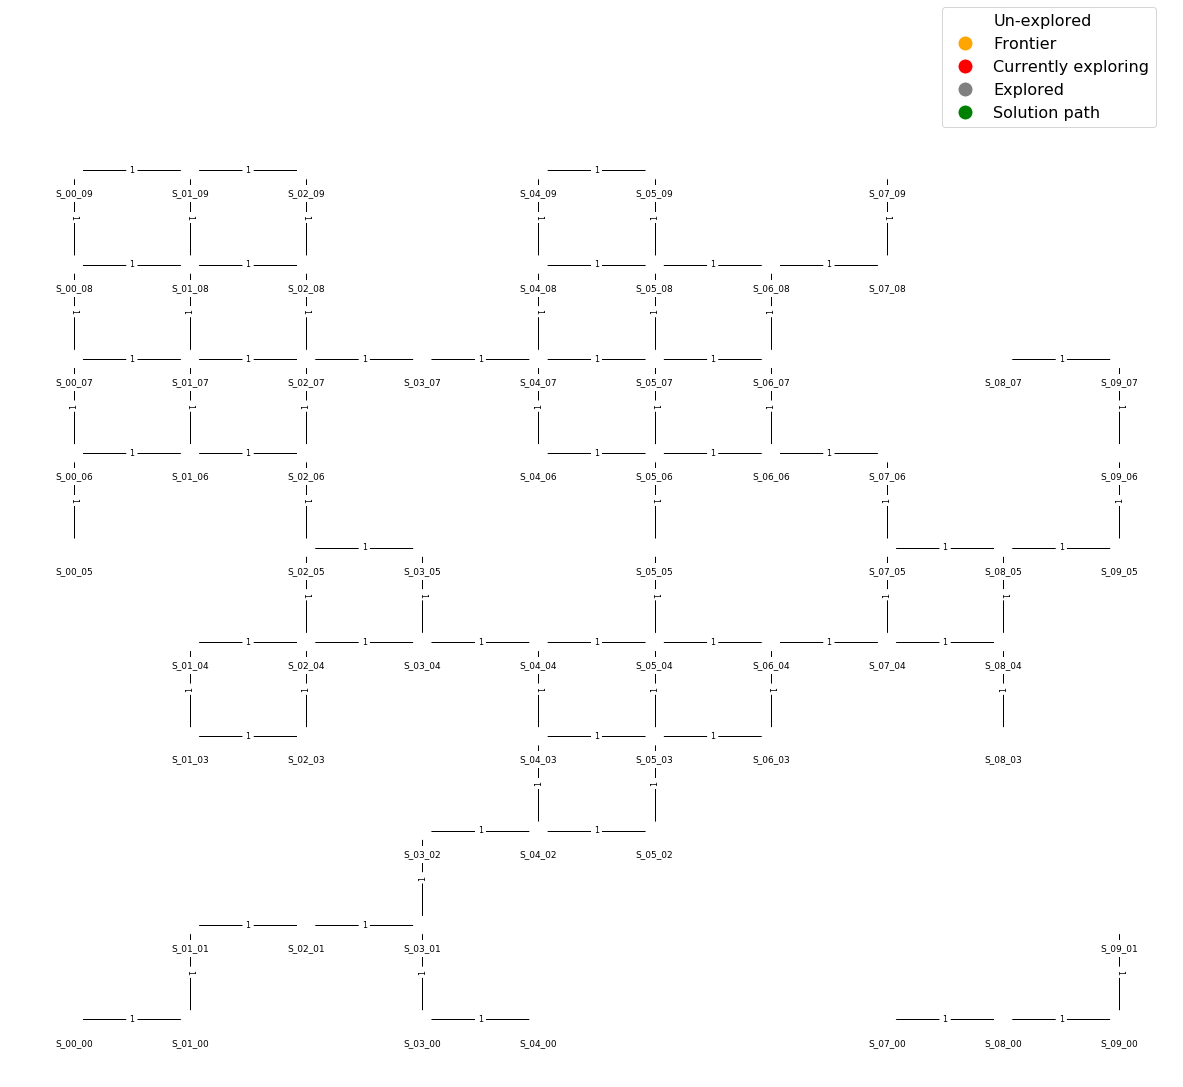

In [126]:
show_map(node_colors)

----

### Q3.2 Solve the graph problem

Now that the graph/map has been completed in Q3.1.6 (c), we will try to use A-star to find a viable path.

#### Q3.2.1 Define the problem using the AIMA toolbox:

Remember, we want to go from state S_00_00 to S_01_09:

- Run the follwing code to instantiate the problem


In [142]:
maze_problem = GraphProblem('S_00_00', 'S_01_09', maze_map)

print("Initial state: " + maze_problem.initial)
print("Goal state: "    + maze_problem.goal)

Initial state: S_00_00
Goal state: S_01_09


----

#### Q3.2.2 (a) Define the A-star search function

The cells below defines an implementation of A-star (utilizing a few helper funciton from the AIMA toolbox). 

- Inspect the source code (or the orginal source in https://github.com/aimacode/aima-python/blob/master/search.py ) and make sure you identify the main steps in the algorithm (e.g. compare to the description in AIMA). Compared to the orginal source, the modified A* function included below allows us to easily plot the solutions etc.

- Execute the following cells to define the A-star search function 


In [128]:
def my_best_first_graph_search(problem, f):
    """Search the nodes with the lowest f scores first.
    You specify the function f(node) that you want to minimize; for example,
    if f is a heuristic estimate to the goal, then we have greedy best
    first search; if f is node.depth then we have breadth-first search.
    There is a subtlety: the line "f = memoize(f, 'f')" means that the f
    values will be cached on the nodes as they are computed. So after doing
    a best first search you can examine the f values of the path returned."""
    
    # we use these two variables at the time of visualisations
    iterations = 0
    all_node_colors = []
    node_colors = dict(initial_node_colors)
    
    f = memoize(f, 'f')
    node = Node(problem.initial)
    
    node_colors[node.state] = "red"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    if problem.goal_test(node.state):
        node_colors[node.state] = "green"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        return(iterations, all_node_colors, node)
    
    frontier = PriorityQueue('min', f)
    frontier.append(node)
    
    node_colors[node.state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    explored = set()
    while frontier:
        node = frontier.pop()
        
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        if problem.goal_test(node.state):
            node_colors[node.state] = "green"
            iterations += 1
            all_node_colors.append(dict(node_colors))
            return(iterations, all_node_colors, node)
        
        explored.add(node.state)
        for child in node.expand(problem):
            if child.state not in explored and child not in frontier:
                frontier.append(child)
                node_colors[child.state] = "orange"
                iterations += 1
                all_node_colors.append(dict(node_colors))
            elif child in frontier:
                incumbent = frontier[child]
                if f(child) < f(incumbent):
                    del frontier[incumbent]
                    frontier.append(child)
                    node_colors[child.state] = "orange"
                    iterations += 1
                    all_node_colors.append(dict(node_colors))

        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
    return None

In [143]:
def my_astar_search(problem, h=None):
    """A* search is best-first graph search with f(n) = g(n)+h(n).
    You need to specify the h function when you call astar_search, or
    else in your Problem subclass."""
    h = memoize(h or problem.h, 'h') # define the heuristic function
    return my_best_first_graph_search(problem, lambda n: n.path_cost + h(n))

----

#### Q3.2.3 (b) Define visualisation functions

- Run the following cell to define a few helper functions for visualising the soluton (you do not need to understand these in detail)

In [144]:
def final_path_colors(problem, solution):
    "returns a node_colors dict of the final path provided the problem and solution"
    
    # get initial node colors
    final_colors = dict(initial_node_colors)
    # color all the nodes in solution and starting node to green
    final_colors[problem.initial] = "green"
    for node in solution:
        final_colors[node] = "green"  
    return final_colors

    
def display_visual(user_input, algorithm=None, problem=None):
    if user_input == False:
        def slider_callback(iteration):
            # don't show graph for the first time running the cell calling this function
            try:
                show_map(all_node_colors[iteration])
            except:
                pass
        def visualize_callback(Visualize):
            if Visualize is True:
                button.value = False
                
                global all_node_colors
                
                iterations, all_node_colors, node = algorithm(problem)
                solution = node.solution()
                all_node_colors.append(final_path_colors(problem, solution))
                
                slider.max = len(all_node_colors) - 1
                
                for i in range(slider.max + 1):
                    slider.value = i
                    #time.sleep(3.)
        
        slider = widgets.IntSlider(min=0, max=1, step=1, value=0)
        slider_visual = widgets.interactive(slider_callback, iteration = slider)
        display(slider_visual)

        button = widgets.ToggleButton(value = False)
        button_visual = widgets.interactive(visualize_callback, Visualize = button)
        display(button_visual)

----

#### Q3.2.4 Run the solver

##### Q3.2.4 (a) Run the solver - simple trace

The A* functions above is a generic implementation which can take different problems and heuristic functions.

- Execute the follwing cell to run A-star on our particular maze problem and visualize the final solution. 
- Identify the heuristic function used for the Maze problem (you'll need to inspect the code below, `search.py` and specifically the `GraphProblem` class) 


----------------------------------------
Identified goal state:<Node S_01_09>
----------------------------------------
Solution trace:[<Node S_01_09>, <Node S_01_08>, <Node S_02_08>, <Node S_02_07>, <Node S_02_06>, <Node S_02_05>, <Node S_03_05>, <Node S_03_04>, <Node S_04_04>, <Node S_04_03>, <Node S_04_02>, <Node S_03_02>, <Node S_03_01>, <Node S_02_01>, <Node S_01_01>, <Node S_01_00>, <Node S_00_00>]
----------------------------------------
Final solution path:


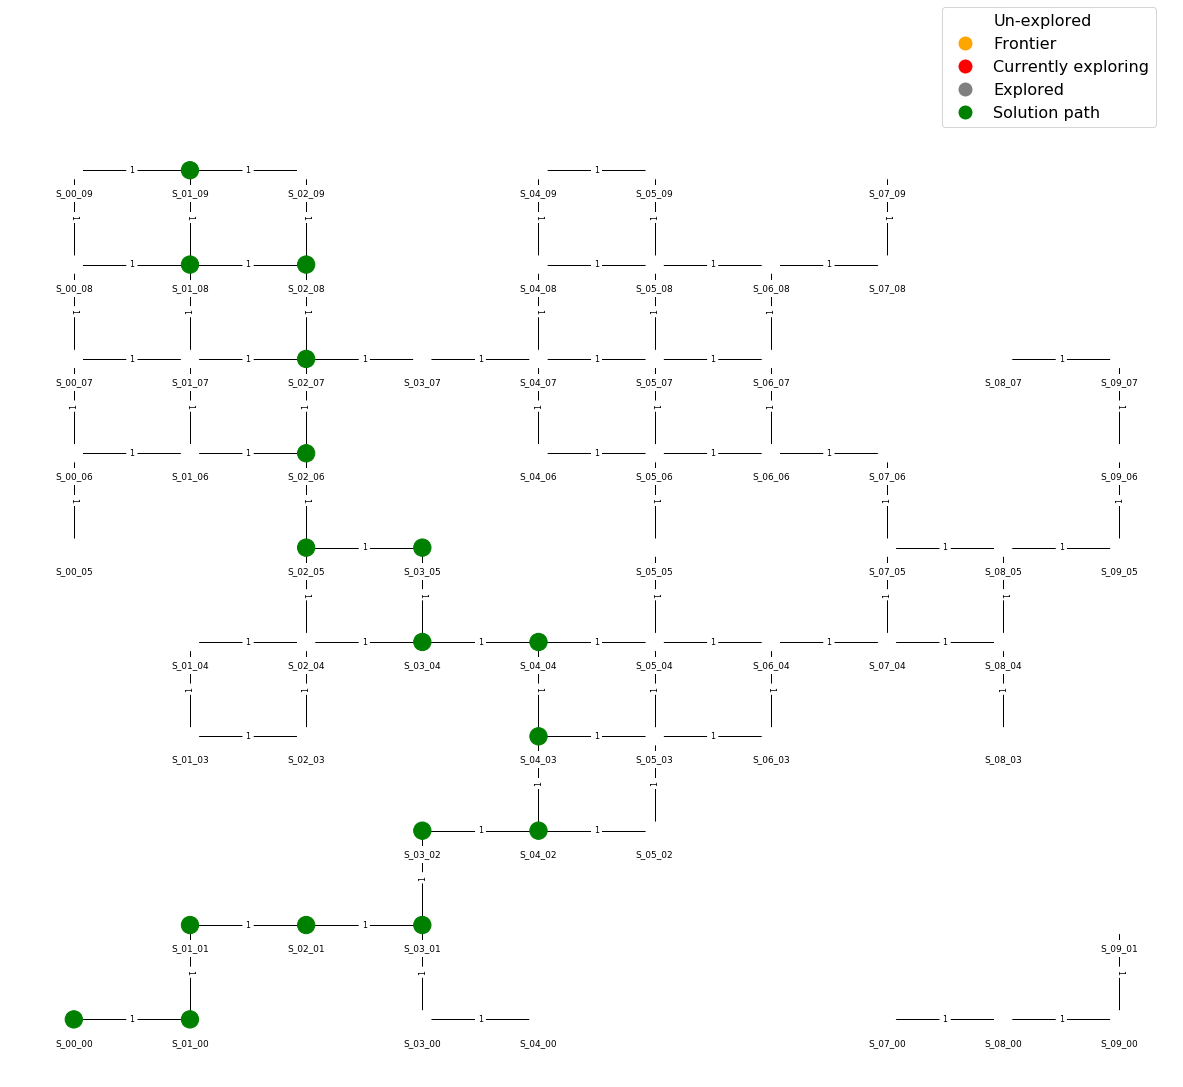

In [150]:
all_node_colors=[]
iterations, all_node_colors, node = my_astar_search(problem=maze_problem, h=None)

#-- Trace the solution --#
solution_path = [node]
cnode = node.parent
solution_path.append(cnode)
while cnode.state != "S_00_00":    
    cnode = cnode.parent  
    solution_path.append(cnode)

print("----------------------------------------")
print("Identified goal state:"+str(solution_path[0]))
print("----------------------------------------")
print("Solution trace:"+str(solution_path))
print("----------------------------------------")
print("Final solution path:")
show_map(final_path_colors(maze_problem, node.solution()))


----

##### Q3.2.4 (b) Run the solver - full trace [optional]

- You can obtain a full trace of the A-star solution by executing the follwing code with `do_full_visualization=True`. However, be aware that the visualisation is not rendered real-time and it will (typically) be presented as individual figures after the solution has been computed.

In [151]:
do_full_visualization = True
if do_full_visualization:     
    # WARNING the FULL visualisation might not work very well on some computers due to 
    # the large graph and the many iterations required.The visualisaiton will 
    # typically compute the solution and do the plotting at the end - and it often takes a long time ...
    #
    print("::: Full Visualization ::::")
    all_node_colors = []
    display_visual(user_input = False, algorithm = my_astar_search, problem = maze_problem)

::: Full Visualization ::::


interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='Visualize'), Output()), _dom_classes=('widget-int…

----

### Q3.3.2 Inspect the solution


- Is the solution returned by `my_astar_search` optimal (hint: you may want to lookup the definition of an optimal solution in AIMA)? Is it supposed to be optimal given you knowledge of A-star and the applied heuristic?
- How many optimal solutions are there for this problem ?

----

### Q3.3.3 Heuristic function

#### Q3.3.3 (a) Heuristic function I

- Modify the heuristic function currently used by A-star and set it to zero for all nodes [note: requires you to insert and/or modify code for example by writing a new h function in this notebook and parse it to my_astar_search in Q3.2.4 ]
- Rerun the A-star solver and inspect the solution - determine if and how the heuristic function has changed the solution (i.e. is it still a valid solution, is it optimal, etc)?
- A-star with $h(n)=0\,\forall n$ corresponds to a basic search method - which one (breadth first search, depth first search, uniform cost search, hill-climbing, etc) ?

---

#### Q3.3.3 (b) Heuristic function II [optional]

- Change the heuristic function currently used by A-star into a inconsistent heuristic (i.e. you may want to look up the definition of a consistent heuristic in AIMA) [note: require you to insert/modify code]
- Rerun the A-star solver. Determine if and how the heuristic function has changed the solution (i.e. is it still a valid solution, is it optimal, etc)?

----

### Q3.3.4 Limitations

- List the required inputs needed by the A-star algorithm for it to work, i.e. what information is needed? [note: if in doubt, inspect the code and function calls ]
- Discuss the limitations of the basic A-star in solving general navigation problems, including cases where we do not have a map of the world, stochastic environments, or noise on the percepts leaving to uncertainty about the state?

----